In [22]:
import os
os.getcwd()
os.chdir('/home/lucasperea/Documents/GithubRep/GraphMaterials/')


import pickle
import numpy as np
import pymatgen
import matplotlib.pyplot as plt
from pymatgen.core.structure import Structure
from GraphFunc.PageRankFunction import PageRank
from GraphFunc.ConexionFunction import Conexion
from GraphFunc.ZeoDataframeFunction import ZeoDataframe
from GraphFunc.EdgeFileFunction import EdgeFile
import seaborn as sns
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
EDI = Structure.from_file('./CifFiles/EDI.cif')
print(len(EDI))
# print(EDI.cart_coords)
dir(EDI)
n = 2
EDI.make_supercell([n,n,n])
print(len(EDI))
n = 3
EDI.make_supercell([n,n,n])
EDI.cart_coords
EDI.lattice.abc
print(len(EDI))
# print(EDI.cart_coords)

15
120
3240


In [38]:
def Supercell(path_cif, lattice_vector, path_supercell):
    
    import pymatgen
    from pymatgen.core.structure import Structure
    from pymatgen.io.cif import CifWriter
    
    struct = Structure.from_file(path_cif)
    struct.make_supercell(lattice_vector)
    
    CifWriter(struct).write_file(path_supercell)
    print('Supercell DONE')
    return struct.lattice.abc

In [ ]:
Supercell('./CifFiles/EDI.cif', [2,2,2], './SupercellFiles/SuperEDI8')

In [30]:
# first_cell = EDI.cart_coords

<IPython.core.display.Javascript object>


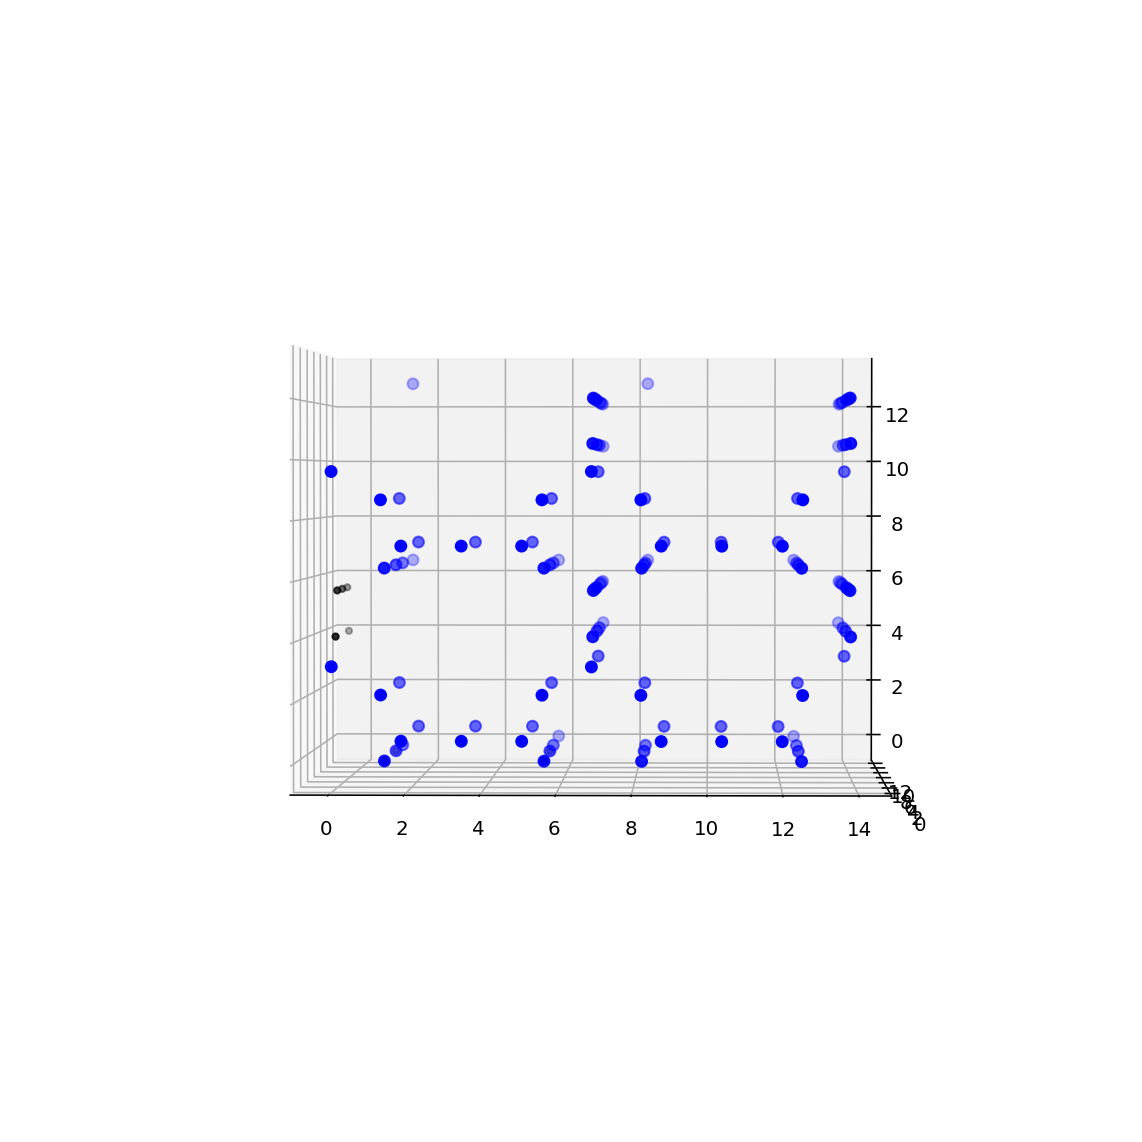

In [31]:
from mpl_toolkits.mplot3d import axes3d
%matplotlib notebook
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111, projection='3d')

# ax.scatter(first_cell[:,0], first_cell[:,1], first_cell[:,2], s=10, c='black')
ax.scatter(EDI.cart_coords[:,0], EDI.cart_coords[:,1], EDI.cart_coords[:,2], s=30, c='blue') 
ax.scatter(first_cell[:,0], first_cell[:,1], first_cell[:,2], s=10, c='black')

In [ ]:

name = 'EDI'

cif_path = './CifFiles/' + name + '.cif'
lattice_mult = 1


nt2_path = './Nt2Files/' + name + '.nt2'

bound_path = './BoundFiles/' + name + '.txt'

iteration = 100


struct = Structure.from_file(cif_path)

cell_dim = struct._lattice.abc


# Supercell
n = lattice_mult
supercell_path = './SupercellFiles/' + name + str(n) + '.cif'

lattice_vector = [n,n,n]

cell_dim = Supercell(cif_path, lattice_vector, supercell_path)

multiplier = np.array([1,1,1]) #6.4
box = np.array([cell_dim[0], cell_dim[1], cell_dim[2]])

edge_table, vertex_table = ZeoDataframe(nt2_path, multiplier, box)

# Create a file that describe conexions between nodes
path_edge_file = EdgeFile(bound_path, edge_table)

# Dictionary used to calulatate the proporcion among the conexion in every node
conexion = Conexion(vertex_table, edge_table)

# Pagerank algorithm 
# return an ax with the selected node located 
info, sum_nodes = PageRank(path_edge_file, conexion, iteration)

# LISTs for size pore/connectivity comparison

most_connected_node = np.argsort(info)[-1] # index of the most connected node
#     info[most_connected_node] # value of the most connected node
#     vertex_table.loc[vertex_table.index == most_connected_node, ['min_dist_atom']].values[0]

comparison_info[cif_name] = {'most_connected_node':most_connected_node, 
                             'value_most_con':value_most_con,
                            'dist_atom':dist_atom}